## TASK 3 - To Explore Decision Tree Algorithm

### Decision Tree Introduction
Decision tree algorithm falls under the category of supervised learning.

They can be used to solve both regression and classification problems.

Decision tree uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.

A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

### Name : Neelesh Tiwari

Email : tiwnilesh022@gmail.com

In [1]:
# Importing all the required libraries 

import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise
import seaborn as sns # to visualise
from sklearn import datasets # for loading the iris dataset

### Loading the iris dataset

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['Species'] = iris.target

### Let's have a look at what our data is like

In [3]:
iris_df.shape

(150, 5)

In [4]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [5]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Species              150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Let's plot our data points, so that we can have a better understanding of our data and it's distribution

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


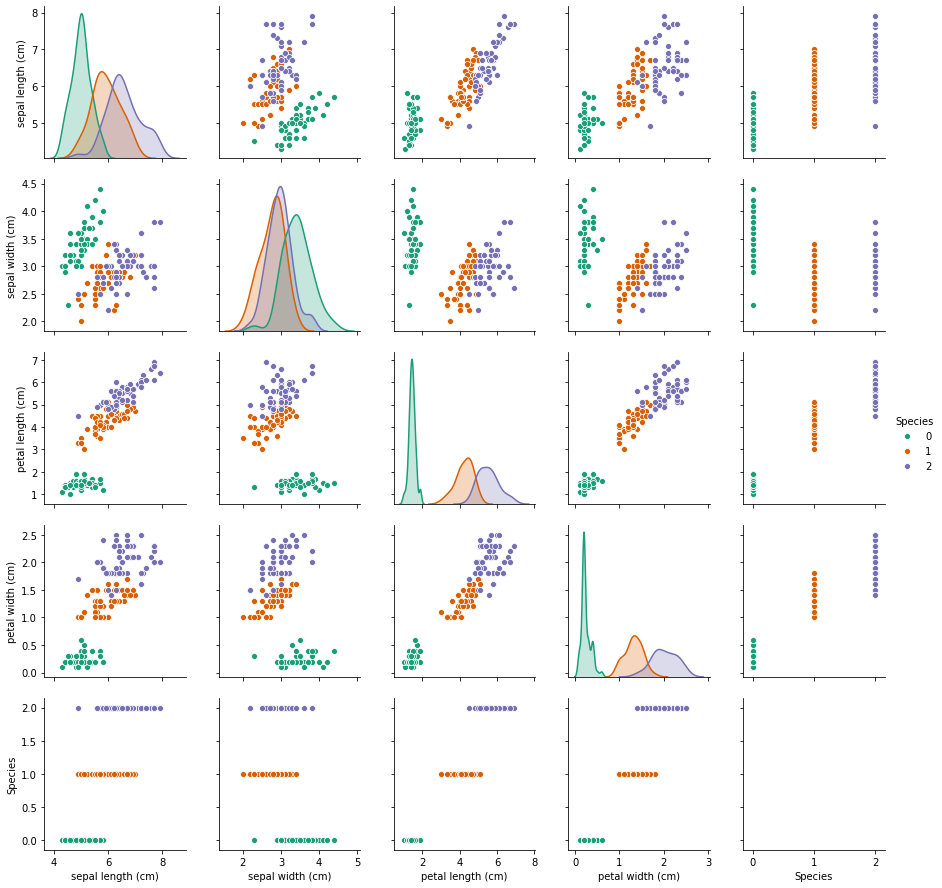

In [8]:
sns.pairplot(iris_df, height=2.5, diag_kind="kde", hue='Species', palette='Dark2')

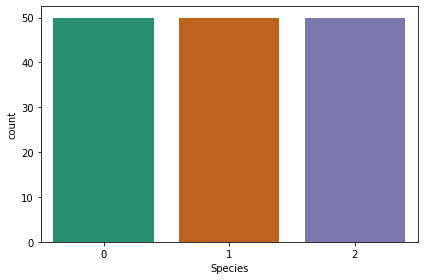

In [9]:
sns.countplot(x="Species", data=iris_df,  palette='Dark2')
plt.tight_layout()

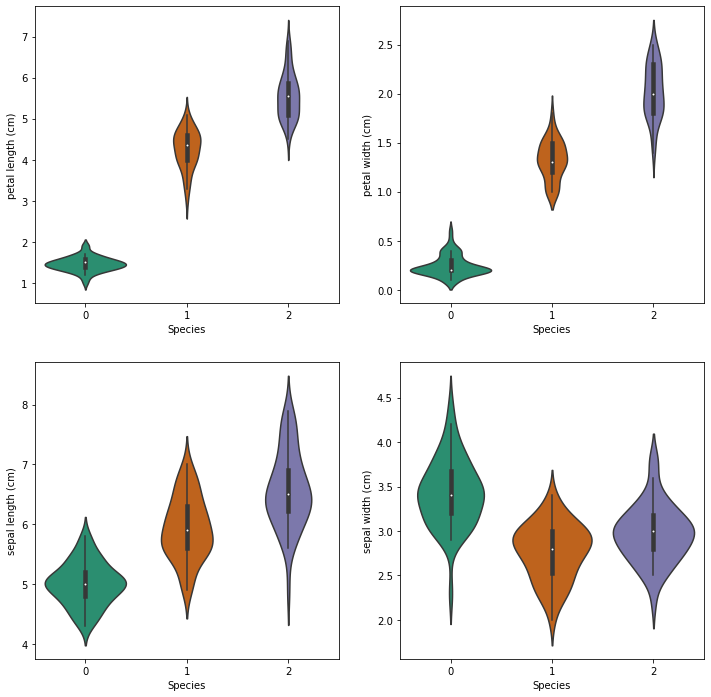

In [10]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
sns.violinplot(x="Species", y="petal length (cm)", data=iris_df, size=7, palette='Dark2')
plt.subplot(2, 2, 2)
sns.violinplot(x="Species", y="petal width (cm)", data=iris_df, size=7, palette='Dark2')
plt.subplot(2, 2, 3)
sns.violinplot(x="Species", y="sepal length (cm)", data=iris_df, size=7, palette='Dark2')
plt.subplot(2, 2, 4)
sns.violinplot(x="Species", y="sepal width (cm)", data=iris_df, size=7, palette='Dark2')

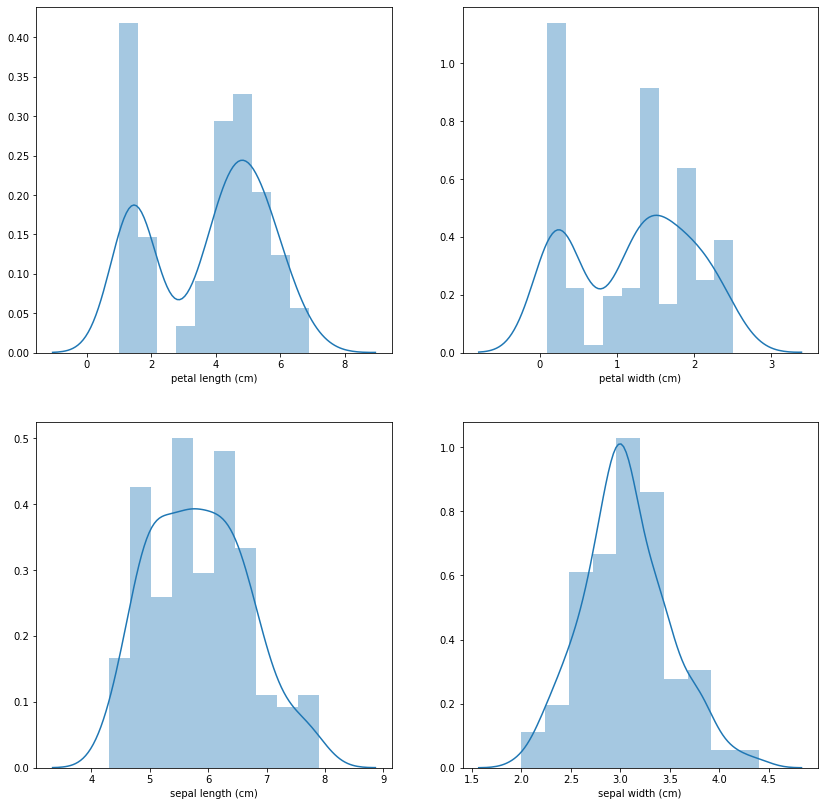

In [11]:
plt.figure(figsize=(14, 14))
binsize = 10
plt.subplot(2, 2, 1)
sns.distplot(a=iris_df["petal length (cm)"], bins=binsize)
plt.subplot(2, 2, 2)
sns.distplot(a=iris_df["petal width (cm)"], bins=binsize)
plt.subplot(2, 2, 3)
sns.distplot(a=iris_df["sepal length (cm)"], bins=binsize)
plt.subplot(2, 2, 4)
sns.distplot(a=iris_df["sepal width (cm)"], bins=binsize)

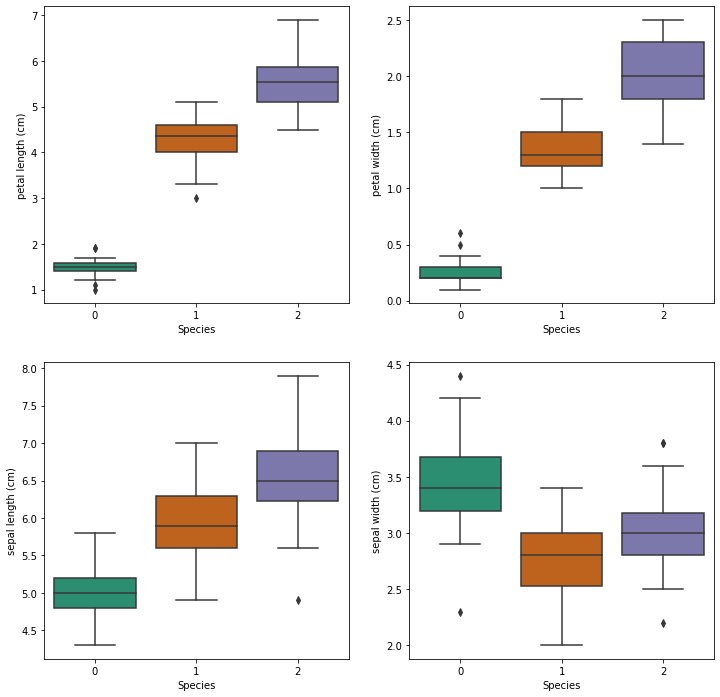

In [12]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
sns.boxplot(x="Species", y="petal length (cm)", data=iris_df, palette='Dark2')
plt.subplot(2, 2, 2)
sns.boxplot(x="Species", y="petal width (cm)", data=iris_df, palette='Dark2')
plt.subplot(2, 2, 3)
sns.boxplot(x="Species", y="sepal length (cm)", data=iris_df, palette='Dark2')
plt.subplot(2, 2, 4)
sns.boxplot(x="Species", y="sepal width (cm)", data=iris_df, palette='Dark2')

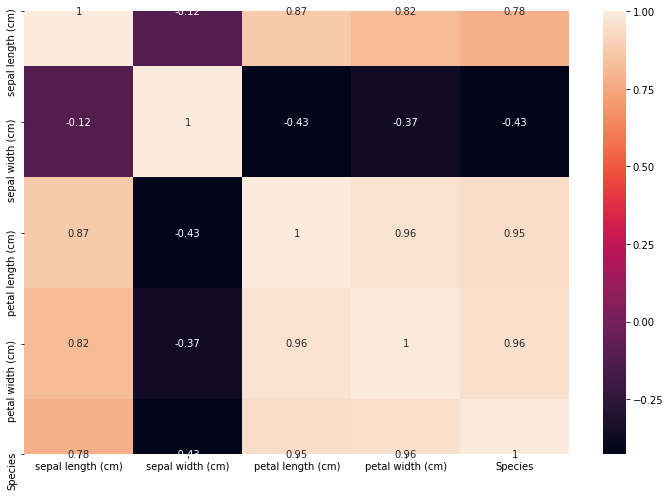

In [13]:
# Plotting heatmap to visualise correlation among features

plt.figure(figsize=(10,7))

sns.heatmap(iris_df.corr(), annot = True)

plt.tight_layout()

### Preparing the data

In this step we divide the data into "attributes" (inputs) and "labels" (outputs).

In [14]:
# Setting variables

X = iris_df.drop('Species', axis=1)
y = iris_df.Species

In [15]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [17]:
# Splitting the data

# import SK Learn train test split
from sklearn.model_selection import train_test_split 

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
# checking the size of train and test data

print('Shape of X_train: ',X_train.shape)
print('Shape of y_train: ',y_train.shape)

print('\n')

print('Shape of X_test: ',X_test.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (105, 4)
Shape of y_train:  (105,)


Shape of X_test:  (45, 4)
Shape of y_test:  (45,)


### Training the Algorithm

In [19]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


### Making predictions based on the model
Now that we have trained our algorithm, it’s time to make some predictions.

To do so, we will use our test data and see how accurately our algorithm predicts the Species.

In [24]:
# Making Predictions

Species_pred = dtree.predict(X_test) # Predicting the scores

print('Prediction completed Sucessfully.')

print('\n')

print('Predicted Species on X_test: ')
Species_pred

Prediction completed Sucessfully.


Predicted Species on X_test: 


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

### Evaluating the model
The final step is to evaluate the performance of algorithm.

This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score

print("************************ Classification Report *************************")
print( classification_report(y_test,Species_pred))
print('\n')
print("**************************** Confusion Matrix ***************************")
print(confusion_matrix(y_test,Species_pred))
print('\n')
print("************************ Accuracy *************************")
print(accuracy_score(y_test,Species_pred))

************************ Classification Report *************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**************************** Confusion Matrix ***************************
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


************************ Accuracy *************************
0.9777777777777777
